# Exercise 0 - Getting started (8 Points)


This exercise is meant to get you familiar with Python. Most of the following exercises are inspired by the highly recommended lecture "Skriptsprachen und Anwendungen (ASQ)" (FMI-BI0058) by Emanuel Barth.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- christoph.staudt@uni-jena.de

### Submission

- Deadline of submission:
        21.04.2022 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=28746)

## Variables, Types

In this lab, we will mostly use two basic types of variables: **numbers** and **strings**. These variables can be grouped in [**lists**](https://www.w3schools.com/python/python_lists.asp), [**dictionaries**](https://www.w3schools.com/python/python_dictionaries.asp) or [**sets**](https://www.w3schools.com/python/python_sets.asp).

### Task 1 (0.25 Points)

Create several variables:
- `x` has the value of 3
- `y` has the value of $2^{100}$
- `a` is a string with the text "pretty little string"
- `l` is a list, that holds `x,y` and `a`
- `d` is a dictionary with the name and phone number of three (imaginary) people
- `s` is a set with 5 numbers

In [10]:
x = 3
y = 2**100
a = "pretty little string"
l = [x, y, a]
d = {
    "Hans": 0,
    "Beta": 2,
    "Kraut": 42
}
s = {0, 1, 2, 3, 4}

## Branches and Loops

Similar to other programming languages, Python has [**for**](https://www.w3schools.com/python/python_for_loops.asp)- and [**while**](https://www.w3schools.com/python/python_while_loops.asp)- loops, as well as [**if-else**](https://www.w3schools.com/python/python_conditions.asp) conditioning.

### Task 2 (0.25 Points)
Use a for loop to iterate over the dictionary `d` and print the persons and their phone numbers.

In [11]:
for name in d:
    print(f"name: {name},\tnumber: {d[name]}")

name: Hans,	number: 0
name: Beta,	number: 2
name: Kraut,	number: 42


### Task 3 (0.25 Points)
Use a for loop to iterate over the set `s` and print only the even numbers.

In [12]:
for number in s:
    if number % 2 == 0:
        print(number)

0
2
4


### Task 4 (0.5 Points)
Calculate the first 10 powers of 2: ($2^0,2^1,2^2,\dots,2^9)$ 
and store them in a list
- using a for loop
- using a while loop

[Assert](https://www.w3schools.com/python/ref_keyword_assert.asp) that results are the same. 

In [13]:
for_list = []
for i in range(10):
    for_list.append(2**i)

while_list = []
power_of_2 = 1
counter = 0
while counter < 10:
    while_list.append(power_of_2)
    power_of_2 *= 2
    counter += 1

assert for_list == while_list

[Functions](https://www.w3schools.com/python/python_functions.asp) are a convenient way to encapsulate calculation steps.

### Task 5 (0.25 Points)
Create a function, that returns a list of the first $n$ [fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [14]:
def fib(n):
    if n <= 0:
        return []
    
    previous = fib(n - 1)
    next_fib = previous[-1] + previous[-2] if n > 2 else 1
    previous.append(next_fib)
    return previous

print(fib(10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


## Classes

[**Classes**](https://www.w3schools.com/python/python_classes.asp) are a convenient way to group calculations and attributes into a single instance. In this lab we will use classes to represent algorithms.

Below you find an example for an iterative algorithm, that calculates the [moving average](https://en.wikipedia.org/wiki/Moving_average) for a sequence of numbers.

In [15]:
class moving_average():
    def __init__(self, k):
        self.k = k
        self.datapoints = None
        self.averages = None
        
    def mean(self, datapoints):
        return sum(datapoints)/len(datapoints)
        
    def fit(self,datapoints):
        self.datapoints = datapoints
        self.averages = []
        if self.k < len(self.datapoints):
            for i in range(len(self.datapoints)-self.k):
                avg = self.mean(self.datapoints[i:i+self.k])
                self.averages.append(avg)

### Task 6 (0.5 Points)

Create a toy dataset and use the `moving_average` class to calculate the moving average.

In [16]:
toy_dataset = [1, 2, 4, 5, 6, 1, 2, 4]
m_avg = moving_average(3)
m_avg.fit(toy_dataset)

### Task 7 (2 Points)

Create your own class that implements the (not efficient) approximation of pi from a [circle with known radius and area](https://academo.org/demos/estimating-pi-monte-carlo/). 

Use the [`random`](https://docs.python.org/3/library/random.html) package for the generation of random numbers. 

In [17]:
import random


class pi_estimator:
    def __init__(self, n):
        self.n = n
        self.result = None

    def estimate(self):
        n_inner = 0
        for _ in range(self.n):
            x = random.random()
            y = random.random()
            if x**2 + y**2 <= 1:
                n_inner += 1
        self.result = 4 * n_inner / self.n


pi_est = pi_estimator(1000000)
pi_est.estimate()
print(pi_est.result)

3.140644


## Numpy and Matplotlib

In the context of scientific computing, [NumPy](https://numpy.org/) is one of the most important packages in Python. 

### Task 8 (2 Point)
Install (not needed if using anaconda) and import numpy. Create a numpy array with 10 numbers. Multiply this array by 10 and calculate the mean of the array.

In [18]:
import numpy as np

np_arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np_arr *= 10
my_avg = np_arr.mean()
print(my_avg)

45.0


### Task 9 (2 Points)

Use numpy to calculate the function 
\begin{equation}
f(x) = x^2-10\sin(2x)
\end{equation}
for $x=1,\dots,50$. 

Use [Matplotlib](https://matplotlib.org/) to draw the function.

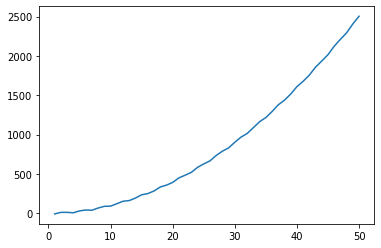

In [19]:
import matplotlib.pyplot as plot

f = lambda x: x**2 - 10 * np.sin(2 * x)
x = np.array(range(1, 51))

plot.plot(x, f(x))
plot.show()